In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

os.chdir('D:\Some Python\Kick Starter Projects')

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
#df1 = pd.read_csv('ks-projects-201612.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['goal'] = df['goal'].astype(np.float64)
df['year'] = df['deadline'].dt.year

# df['goal'] = df['goal'].apply(lambda x: '%5f' % x) #I can't delete de decimal numbers in each cell
# df['goal'] = df['goal'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [7]:
country = df['country'].value_counts()
country

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

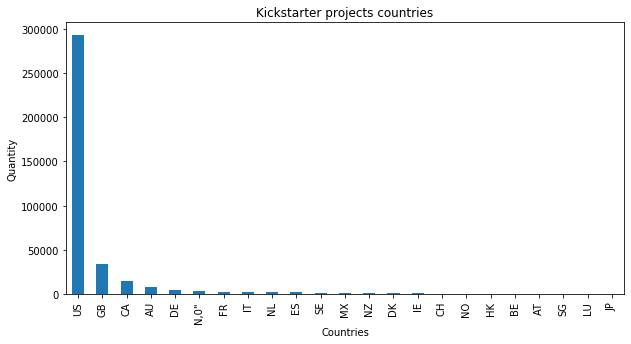

In [8]:
country.plot(kind = 'bar', figsize=(10,5), width = 0.50)
plt.title ('Kickstarter projects countries')
plt.ylabel ('Quantity')
plt.xlabel ('Countries')
plt.show()

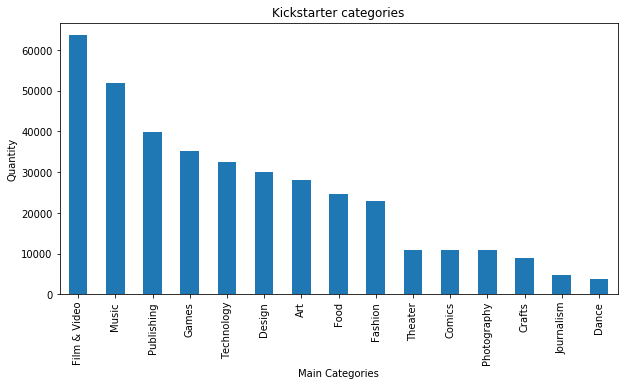

In [9]:
mcategory = df['main_category'].value_counts()

mcategory.plot(kind = 'bar', figsize=(10,5), width = 0.50)
plt.title ('Kickstarter categories')
plt.ylabel ('Quantity')
plt.xlabel ('Main Categories')
plt.show()

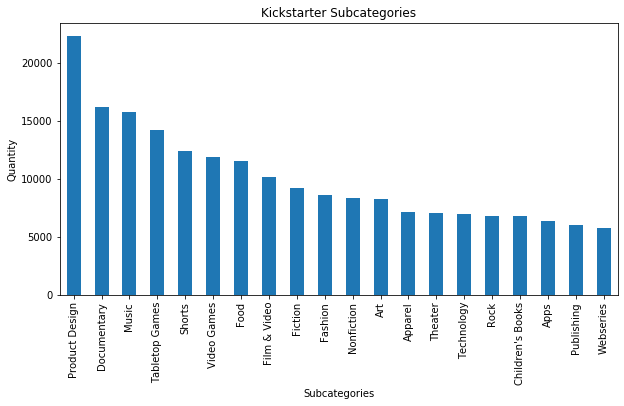

In [10]:
category = df['category'].value_counts()
category = category.head(20)
category.plot(kind = 'bar', figsize=(10,5))
plt.title ('Kickstarter Subcategories')
plt.ylabel ('Quantity')
plt.xlabel ('Subcategories')
plt.show()


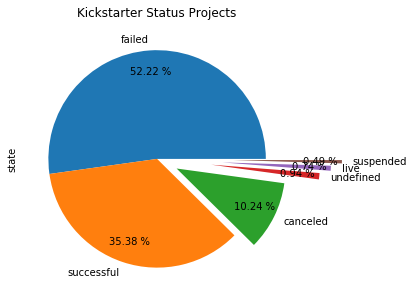

In [11]:
state = df['state'].value_counts()
label = df['state'].unique()
explode = (0,0,0.2,0.5,0.6,0.7)

#plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,5))
# plt.pie(state, autopct='%.2f %%', labels = label, explode=explode, pctdistance=0.8) #esta etiqueta estam mal
state.plot (kind = 'pie', autopct='%.2f %%', explode = explode, pctdistance = 0.8)

plt.title ('Kickstarter Status Projects')

plt.show()

In [12]:
pd.pivot_table(df, values = 'goal', index = 'state', aggfunc = pd.Series.nunique)
# successful.sort_values(by = 'state', ascending = False)


,goal
state,
canceled,1965.0
failed,5787.0
live,354.0
successful,3514.0
suspended,285.0
undefined,280.0


NOTE TO SELF:
How to know how much pledged of successful projects only

In [13]:
# pledged = df.groupby('country').sum()['us pledged'].sort_values(ascending = False)
# pledged = pledged.apply(lambda x: '%.0f' % x)
# pledged

In [14]:
[df['pledged'].sum(), df['goal'].sum()] 

[3666566639.660001, 18584981597.969994]

NOTE TO SELF: 
how to display during years in bars. -> DONE

In [15]:
goalvspledged = pd.pivot_table(df, values=['goal','pledged'], index = 'year', aggfunc = sum )
goalvspledged.sort_values(by= 'year', ascending = True)
tograph = goalvspledged.reset_index()
yearsunique = tograph.iloc[:,0].tolist()
goal = tograph['goal'].tolist()
pledged = tograph['pledged'].tolist()
goalvspledged

,goal,pledged
year,,
2009,6.565473e+06,1.839587e+06
2010,1.241338e+08,2.492407e+07
2011,3.044785e+08,9.309696e+07
2012,7.784238e+08,3.124962e+08
2013,1.146266e+09,4.574348e+08
2014,3.192393e+09,5.160622e+08
2015,5.616206e+09,7.133033e+08
2016,3.916332e+09,7.062563e+08
2017,3.249947e+09,8.134911e+08


In [20]:
try1 =df.groupby('year')['goal','pledged'].sum().sort_values(by = 'year', ascending = True)
try1

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,goal,pledged
year,,
2009,6.565473e+06,1.839587e+06
2010,1.241338e+08,2.492407e+07
2011,3.044785e+08,9.309696e+07
2012,7.784238e+08,3.124962e+08
2013,1.146266e+09,4.574348e+08
2014,3.192393e+09,5.160622e+08
2015,5.616206e+09,7.133033e+08
2016,3.916332e+09,7.062563e+08
2017,3.249947e+09,8.134911e+08


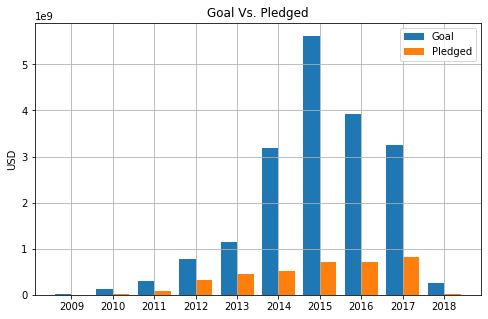

In [17]:
labels = yearsunique



x = np.arange(len(labels))
width = 0.40

fig, ax = plt.subplots(figsize=(8,5))
goalblue = ax.bar(x - width/2, goal, width, label = 'Goal', )
pledgedorange = ax.bar(x + width/2, pledged, width,  label = 'Pledged')

# fig, ax = plt.subplots(2,2,figsize=(15,15))

ax.set_ylabel('USD')
ax.set_title('Goal Vs. Pledged')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0)
ax.legend()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(goalblue)
# autolabel(pledgedorange)
plt.grid()
plt.show()


NOTE TO SELF: What do i need to do in order to sum, the total amount of each category, and comparing the total of successful projects per category


In [21]:
try1.xs['year']

TypeError: 'method' object is not subscriptable